<a href="https://colab.research.google.com/github/jumafernandez/UNLP/blob/master/Cuestionario-Fernandez_Juan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cuestionario Final: Minería de Textos

En esta notebook se responden a las consignas del cuestionario propuesto para aprobar el curso Minería de Textos de la Especialización en Inteligencia de Datos con orientación en Big Data de la Universidad Nacional de La Plata.
<br />
<br />

__Estudiante:__ Juan Manuel Fernandez, <br />
__DNI:__ 30.939.704.

## Parte A: Pre-procesamiento de Textos
### Tokenización
__1. Dé el vocabulario (y su tamaño) que se generaría cuando la tokenización se realiza por palabra (1-grama), bigrama de palabras y
5-gramas de caracteres.__

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

# Se define el corpus
frase = ["su auto grande pasó velozmente", "tu auto rojo es más caro"]
print("frase:{}\n".format(frase))

# Se muestra el vocabulario y su tamaño para una tokenización de 1-grama (por palabra)
cv = CountVectorizer(ngram_range=(1, 1)).fit(frase)
print("Tamaño de vocabulario: {}".format(len(cv.vocabulary_)))
print("Vocabulario:{}".format(cv.get_feature_names()))
print("\n")

# Se muestra el vocabulario y su tamaño para una tokenización de bigrama (2 palabras)
cv = CountVectorizer(ngram_range=(2, 2)).fit(frase)
print("Tamaño de vocabulario: {}".format(len(cv.vocabulary_)))
print("Vocabulario:\n{}".format(cv.get_feature_names()))
print("\n")

# Se muestra el vocabulario y su tamaño para una tokenización de 5-gramas de char (5 char)
cv = CountVectorizer(analyzer='char',ngram_range=(5, 5)).fit(frase)
print("Tamaño de vocabulario: {}".format(len(cv.vocabulary_)))
print("Vocabulario:\n{}".format(cv.get_feature_names()))


frase:['su auto grande pasó velozmente', 'tu auto rojo es más caro']

Tamaño de vocabulario: 10
Vocabulario:['auto', 'caro', 'es', 'grande', 'más', 'pasó', 'rojo', 'su', 'tu', 'velozmente']


Tamaño de vocabulario: 9
Vocabulario:
['auto grande', 'auto rojo', 'es más', 'grande pasó', 'más caro', 'pasó velozmente', 'rojo es', 'su auto', 'tu auto']


Tamaño de vocabulario: 43
Vocabulario:
[' auto', ' caro', ' es m', ' gran', ' más ', ' pasó', ' rojo', ' velo', 'ande ', 'asó v', 'auto ', 'de pa', 'e pas', 'elozm', 'es má', 'grand', 'jo es', 'lozme', 'mente', 'más c', 'nde p', 'o es ', 'o gra', 'o roj', 'ojo e', 'ozmen', 'pasó ', 'rande', 'rojo ', 's car', 's más', 'su au', 'só ve', 'to gr', 'to ro', 'tu au', 'u aut', 'uto g', 'uto r', 'veloz', 'zment', 'ás ca', 'ó vel']


__2. Dé su opinión de cuales serían las limitaciones de la primera forma de particionado (1-grama) y los posibles patrones que permitiría
capturar los restantes dos enfoques.__ 

Las limitaciones del 1-grama residen en que, por un lado, no puede capturar el contexto de la palabra que si se lograría a través de un n-grama (con n>1) de palabras y en que, por otro lado, no tenemos forma de tomar la "raíz" de la palabra sin aplicar alguna técnica adicional (como stemming o lematización), cuestión que si podría lograrse a partir de n-gramas de caracteres.

En relación a ésto último, si representamos los términos a partir de n-gramas de caracteres, las palabras con la misma raíz, pero con diferentes sufijos, darían un cierto número de n-gramas iguales más algunos diferentes, es decir, los correspondientes a los sufijos. Esta coincidencia parcial de los n-gramas producidos serviría para establecer una similitud entre ambas palabras, a pesar de que no son exactamente las mismas.
Por la misma razón, la extracción de n-gramas puede atenuar los problemas derivados de los errores tipográficos y ortográficos [1].

__3. El uso de 3-gramas de caracteres es un enfoque que ha dado buenos
resultados en el idioma inglés. ¿Considera usted que en el español podría ser mejor utilizar un número n distinto de caracteres contiguos? Justifique.__  

La cantidad de n-gramas de caracteres "óptima" puede variar dado que no solo del idioma del texto sino que, además, puede variar dentro del mismo idioma para contextos distintos. No obstante, algunos estudios [2] plantean que el hecho de que, en general, las palabras en el idioma español son mas largas que en el idioma inglés genera que n-gramas mayores a 3 den mejores resultados en nuestro idioma. De hecho, en el estudio citado, los mejores resultados fueron alcanzados con n-gramas con n=6 y n=7.


### Normalización (truncado y lematización) y POS-tagging

__1. Utilizando alguno de los "stemmers on-line" provistos en el sitio http://textanalysisonline.com/ (por ejemplo http://textanalysisonline.com/nltk-porter-stemmer), chequee cual sería el resultado que el stemmer de Porter arrojaría para la cadena:
_"Some housewives felt scared when they heard a lot of mice"___ 

El resultado de aplicar el stemmer de Porter es _"Some housew felt scare when they heard a lot of mice"_. Básicamente, los tokens que modifica son _housewives_ por _housew_ y _scared_ por _scare_.
<br /> <br />

__2. Describa cual sería el resultado que a su criterio produciría un
sistema de lematización con la misma cadena.__ 

Como vimos durante el curso, la lematización en formas verbales busca el infinitivo y en sustantivos transforma a su forma singular. El lematizador de _spacy_ genera la salida que se puede ver a partir de la próxima celda de código modificando los siguientes términos:
- Verbos: felt (feel) y heard (hear),
- Sustantivos: housewives (housewive) y mice (mouse).

Adicionalmente, transforma a minúsculas el texto y reemplaza el pronombre _they_ por PRON.


In [25]:
import spacy

# cargar el modelo del lenguaje inglés de spacy
en_nlp = spacy.load('en')

# tokenizar documento con spacy
doc_spacy = en_nlp("Some housewives felt scared when they heard a lot of mice")

# imprimir lemas encontrados por spacy
print("Lematización:")
print([token.lemma_ for token in doc_spacy])


Lematización:
['some', 'housewife', 'feel', 'scared', 'when', '-PRON-', 'hear', 'a', 'lot', 'of', 'mouse']


__3. Describa y explique cual es el resultado que el POS-tagger online de spaCy (disponible en http://textanalysisonline.com/spacy-pos-tagging) produce con la misma cadena.__  

El resultado que arroja el POS-tagger es el siguiente:
"Some|DET housewives|NOUN felt|VERB scared|ADJ when|ADV they|NOUN heard|VERB a|DET lot|NOUN of|ADP mice|NOUN".

El POS-tagger etiqueta los términos del vocabulario de acuerdo al rol que juegan dentro del documento en relación a si se trata de un sujeto, verbo, adjetivo, adverbio, etc.



### Sentidos de las palabras y Wordnet
__1. Defina con sus palabras a qué se denomina synset en Wordnet, y en
que consisten las relaciones semánticas de hiperonimia, hiponimia y meronimia.__

Un synset es un conjunto de elementos que refieren al mismo tema.
A continuación se define el resto de los conceptos:
- Hiperonimia: La hiperonimia es una relación que se establece entre una palabra de carácter más general y otra de carácter más específico, es decir, un hiperónimo designa aquel término general que puede ser utilizado para referirse a la realidad nombrada por un término más particular [3].
- Hiponimia: Es la relación inversa a la que se produce con las hiperonimias.
- Meronimia: Es una relación entre dos palabras donde una refiere a una parte de la otra (pie -> dedo del pié).
<br /><br />

__2. Descargando y utilizando el sistema Wordnet 2.1 disponible en https://wordnet.princeton.edu/download, determine a que distancia (en número de conceptos recorridos) se encuentra el primer sentido del sustantivo (noun) nose del concepto organ siguiendo la relación de hiperonimia ("es una clase de") y a que distancia del concepto de body siguiendo la relación de holonimia ("es una
parte de"). A modo de ejemplo: si buscamos la palabra cat (gato) y usamos el botón "Noun" para ver las distintas relaciones semánticas como sustantivo, veremos que siguiendo la relación de hiperonimia, "cat" se encuentra a una distancia de 5 (5 saltos) en la relación de hiperonimia, dada por la siguiente secuencia: cat ⇒ feline ⇒ carnivore ⇒ placental ⇒ mammal ⇒ vertebrate.__

<br />
Hiperonimia: nose => chemoreceptor => sense organ => organ (3) <br />
Holonimia: nose => face => head => body (3)


### Reconocimiento de Entidades nombradas

__Utlizando el reconocedor de entidades nombradas de spaCy disponible en http://textanalysisonline.com/spacy-named-entity-recognition-ner, describa cual es el resultado del mismo al aplicarlo a las siguientes sentencias: <br/>
"Washinton was born into slavery on the farm of James Burroughs." <br/>
"In June, Washington passed a primary seatbelt law." <br/>
Explique además el porqué del etiquetado diferente de Washington en
los dos casos.__  <br/>

Para la primera oración el resultado es: <br />
- Washinton|PERSON <br />
- James Burroughs|PERSON  <br />

Mientras que el resultado de la segunda es:  <br />
- June|DATE  <br />
- Washington|GPE  <br />

El resultado es el descripto dado que el reconocedor de entidades describe a Washington como una persona (PERSON) en la primera oración mientras que en la segunda encuentra que se trata de una entidad geopolítica (GPE).


## Parte B: Representación de documentos

### Representación Bolsa de Palabras (BoW)

__1. Especifique cómo hubiera sido la representación de vector del primer documento, si en lugar de utilizar un pesado tf, hubiera utilizado una codificación SMART.__

In [32]:
documentos = ["Los jugadores llevaban la pelota oficial al estadio",
              "Durante el partido, los jugadores no tocaron la pelota",
              "El estadio de Wembley es el estadio más conocido de Londres",
              "Los senadores pudieron votar la ley en el congreso",
              "Todos los senadores del partido opositor pidieron vetar la ley"]

primer_documento = ["Los jugadores llevaban la pelota oficial al estadio"]

from sklearn.feature_extraction.text import TfidfVectorizer
vect_tf_idf = TfidfVectorizer(use_idf=True, sublinear_tf=False, smooth_idf=False)
vect_tf_idf.fit(documentos)

bow_tf_idf_1 = vect_tf_idf.transform(primer_documento)
print("Matriz documentos - términos (pesado tf-idf normalizado):\n{}".format(bow_tf_idf_1.toarray()))

print("\nTamaño de vocabulario: {}".format(len(vect_tf_idf.vocabulary_)))

print("\nTérminos del vocabulario: {}".format(vect_tf_idf.get_feature_names()))


Matriz documentos - términos (pesado tf-idf normalizado):
[[0.44467176 0.         0.         0.         0.         0.
  0.         0.         0.         0.32655323 0.32655323 0.2084347
  0.         0.44467176 0.         0.2084347  0.         0.
  0.44467176 0.         0.         0.32655323 0.         0.
  0.         0.         0.         0.         0.         0.        ]]

Tamaño de vocabulario: 30

Términos del vocabulario: ['al', 'congreso', 'conocido', 'de', 'del', 'durante', 'el', 'en', 'es', 'estadio', 'jugadores', 'la', 'ley', 'llevaban', 'londres', 'los', 'más', 'no', 'oficial', 'opositor', 'partido', 'pelota', 'pidieron', 'pudieron', 'senadores', 'tocaron', 'todos', 'vetar', 'votar', 'wembley']


__En las 3 representaciones distribucionales vistas (DOR, TCOR y CSA), primero se obtenía una representación vectorial de los términos y luego se generaba una representación de los documentos haciendo una suma ponderada de los vectores de las palabras que aparecían en cada documento. Esto lleva a que la dimensionalidad de los vectores que representan a los documentos en cada caso, sea igual a la dimensionalidad de los vectores de los términos que le dieron origen. En base a las anteriores consideraciones, diga cual sería la dimensionalidad de un documento en cada uno de los enfoques distribucionales (DOR, TCOR y CSA) para los documentos del ejemplo. Para el caso de CSA, asuma que los documentos están etiquetados como pertenecientes a dos clases: "deporte" o "política".__ <br />

DOR: N (cantidad de documentos).

TCOR: M (cantidad de términos).

CSA: R (cantidad de clases). En este caso es 2. 

__Para cada una de las 3 representaciones distribucionales (DOR, TCOR y CSA), obtenga la representación de vector de los términos "pelota" y "partido". En el caso de CSA, asuma que los 3 primeros documentos están etiquetados como pertenecientes a la clase "deporte" y los últimos dos a la clase "política".__

A continuación se presentan los resultados para la representación DOR:


| termino |  d1  |  d2  | d3 | d4 | d5   |
| ------- | ---- | ---- | -- | -- | ---- |
|pelota   | 0,73 | 0,67 | 0  | 0  | 0    |
|partido  | 0    | 0,70 | 0  | 0  | 0,70 |

<br />


__CSA:__

| termino |  deporte  |  politica  |
| ------- |  -------  |  --------  |
| pelota  |  2.11     |  0         |
| partido |  1.06     |  3.29      |

<br />

Se puede acceder a una planilla de cálculo con los cálculos auxiliares en la siguiente ubicación:
https://github.com/jumafernandez/UNLP/blob/master/MT/Calculos-Auxiliares.xlsx



## Categorización y clustering de documentos

### Evaluación de un clasificador de textos

__En base a esta matriz de confusión, se determina:__ <br />
__1. El número total de documentos en el test set:__ 100.  <br />
__2. El total de documentos que el clasificador categorizó como joven:__ 25. <br />
__3. El total de documentos rotulados como adolescente por el experto:__ 57.  <br />
__4. La exactitud (accuracy) del clasificador:__ 0.81 (81%).  <br />

<br />

__Calcule ahora la precision (πC) y recall (ρC) de cada clase C
correspondiente a la matriz de confusión del ejercicio anterior.__ <br />

| clase        |  recall  |  precision  |
| ------------ | -------- | ----------- |
|adolescente   | 0,79     |  0,92       |
|joven         | 0,76     |  0,64       |
|adulto        | 0,91     |  0,77       |

<br />

__Rara vez precision y recall son consideradas en forma aislada.
De ser así, siempre es posible encontrar clasificadores triviales que maximizan una a expensas de la otra. Una solución es encontrar medidas combinadas como la F-measure (medida F).__ 
<br />
__Obtenga la matriz de confusión de cada participante y complete las
columnas faltantes, considerando que el ranking oficial se determina
por el valor de F0,5.__



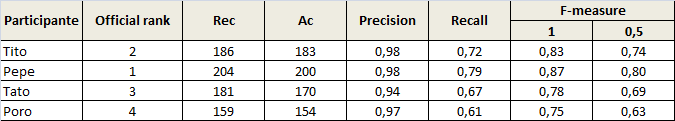




###  Clustering y medidas de similitud

__En base a la información mostrada previamente, calcule la similitud entre los puntos p y q utilizando el coeficiente de matching simple y el coeficiente de Jaccard.__

mat-simple = 7/10 = 0.70 <br />

Jaccard = 0 <br />

__Diga cual es la instancia (documento) más cercana a la instancia i2, de acuerdo al coeficiente de Jaccard.__ <br />

i1-i2 = 4/12 = 0.33 <br />
i3-i2 = 5/11 = 0.45 <br />
i4-i2 = 3/11 = 0.27 <br />
 <br />

La instancia mas cercana es la i3.

__Calcule la similitud coseno de los dos objetos de datos p y q que
se muestran a continuación, que podrían representar vectores de
documentos: <br />
p = (3, 2, 0, 5, 0, 0, 0, 2, 0, 0) <br />
q = (1, 0, 0, 0, 0, 0, 0, 1, 0, 2)__ <br />

cos(p, q) = 5/(6.48*2.44) = 0.31. <br />

### Distancia de edición mínima (Levenshtein)

__Describa cual sería la distancia de Levenshtein entre las palabras INTENTION y EXECUTION justificando el resultado en base a las operaciones involucradas.__

Las operaciones involucradas en la transformación son las siguientes:
- Se modifica la I por la E,
- Se modifica la N por la X,
- Se modifica la T por la E,
- Se modifica la E por la C,
- Se modifica la N por la U.

A partir de lo anterior, se puede deducir que la distancia de Levenshtein es 5.

### Evaluación de agrupamientos: Coeficiente de Silueta

__Suponga que con los siguientes datos (uni-dimensionales):__  <br />
__{1, 5, 9, 20, 25, 30, 35, 52, 54, 58, 60}__, <br />
__un algoritmo de clustering ha generado los siguientes grupos:__  <br />
__G1 = {1, 5, 9, 20}__ <br />
__G2 = {25, 30, 35}__ <br />
__G3 = {52, 54, 58, 60}__ <br />  

__1. Estime el coeficiente de silueta para el objeto 5 (s(5)) del grupo
G1 y para el objeto 20 del mismo grupo.__
<br />
s(5) = 0.73 <br />
s(20) = -0.33 <br />
<br />

__2. ¿Qué sucede si el objeto 20 es cambiado del grupo G1 al G2? Para
determinar eso, recalcule nuevamente los valores de s(5) y s(20)
con esta nueva configuración de los grupos.__
<br />
s(5) = 0.83 <br />
s(20) = 0.33 <br />
<br />

__3. En base a los valores obtenidos en los dos puntos anteriores, ¿qué
puede decir sobre la pertenencia o no del objeto 20 al grupo G1?__

Claramente, el grupo de pertenencia del punto 20 es el 2 debido a que de esa manera se maximizan las distancias con los demas clusters y se minimiza la intracluster.

Se puede acceder a una planilla de cálculo con los cálculos auxiliares en la siguiente ubicación:
https://github.com/jumafernandez/UNLP/blob/master/MT/Calculos-Auxiliares.xlsx


### Aplicaciones (opcional)
__En el artículo _Vector-based word representations for sentiment analysis: a comparative study_ (disponible en http://sedici.unlp.edu.ar/handle/10915/56763) realizamos un estudio preliminar de distintas representaciones de documentos en un problema particular de análisis de sentimiento. Describa cuales fueron las representaciones utilizadas, algoritmos utilizados, resultados obtenidos, etc y dé su opinión sobre este trabajo en base a los conceptos vistos en el curso. Si existe otro tipo de aplicación/trabajo de su interés, puede utilizar ese artículo si lo desea realizando un análisis similar.__ <br /> <br />

El objetivo del trabajo consiste en analizar el uso de varias representaciones de palabras para una tarea de análisis de sentimientos sobre críticas de películas con la base de datos de _IMDB Review Dataset_.

Específicamente, el trabajo se centra en analizar representaciones basadas en vectores al considerar cuatro métodos del área de distribución (_SOA, LSA, LDA, DOR_) y un representante del enfoque de representación distribuida (_Word2Vec_). A su vez, el estudio toma la representación de _bag of words_ como línea de base.

Para la comparación de _performance_ se decidió clasificar las críticas a partir de dos técnicas de clasificación diferentes: _naive Bayes_ y _Lib linear_. 
Una cuestión importante que contribuye a que el experimento sea reproducible es que constan en el trabajo los parámetros seteados para los mismos.

Por último, se decidió evaluar los resultados en función de la métrica de selección de modelos _accuracy_ por encima de otras clásicas -y que trabajamos durante el curso- como _recall, precisión_ o _F-score_.


## Referencias
[1] Pollock, J. J., & Zamora, A. (1984). System design for detection and correction of spelling errors in scientific and scholarly text. Journal of the American Society for Information Science, 35(2), 104-109.

[2] Figuerola, C. G., Gómez, R., & de San Román, E. L. (2000). Stemming and n-grams in spanish: an evaluation of their impact on information retrieval. Journal of Information Science, 26(6), 461-467.

[3]	Prolee (2019). Hiperonimia. Recuperado de http://www.anep.edu.uy/prolee/index.php/glosario/49-hiperonimia.

[4]	Prolee (2019). Hiponimia. Recuperado de http://www.anep.edu.uy/prolee/index.php/glosario/51-hiponimia.
